In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image


# Load images function
def load_images_and_labels(image_dir, target_size, label=0):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        file_path = os.path.join(image_dir, filename)
        if os.path.isfile(file_path) and (filename.endswith('.jpg') or filename.endswith('.png')):
            try:
                img = Image.open(file_path).convert("RGB")
                img = img.resize(target_size)
                img_array = np.array(img) / 255.0  # Normalizasyon
                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    return np.array(images), np.array(labels)

# Dataset directories
train_dir = 'C:/Users/Arda Deniz/Desktop/MachineLearning_TermProject/Chess_pieces/train/images'
valid_dir = 'C:/Users/Arda Deniz/Desktop/MachineLearning_TermProject/Chess_pieces/valid/images'
test_dir = 'C:/Users/Arda Deniz/Desktop/MachineLearning_TermProject/Chess_pieces/test/images'

train_labels = 'C:/Users/Arda Deniz/Desktop/MachineLearning_TermProject/Chess_pieces/train/labels'
valid_labels = 'C:/Users/Arda Deniz/Desktop/MachineLearning_TermProject/Chess_pieces/valid/labels'  
test_labels = 'C:/Users/Arda Deniz/Desktop/MachineLearning_TermProject/Chess_pieces/test/labels'    

# load images and labels
train_images, train_labels = load_images_and_labels(train_dir, target_size=(416, 416), label=0)  # Tüm etiketler aynı sınıfta
valid_images, valid_labels = load_images_and_labels(valid_dir, target_size=(416, 416), label=0)
test_images, test_labels = load_images_and_labels(test_dir, target_size=(416, 416), label=0)

# Check shapes
print(f"Train set: {train_images.shape}, {train_labels.shape}")
print(f"Validation set: {valid_images.shape}, {valid_labels.shape}")
print(f"Test set: {test_images.shape}, {test_labels.shape}")



Train set: (606, 416, 416, 3), (606,)
Validation set: (58, 416, 416, 3), (58,)
Test set: (29, 416, 416, 3), (29,)


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,  # Rotates the image 45 degrees
    width_shift_range=0.3,  # width shifting
    height_shift_range=0.3,  # height shifting  
    shear_range=0.3,  # Shear transformation
    zoom_range=0.5,  # Zoom in and out  
    horizontal_flip=True,  # Horizontal flip
    fill_mode='nearest'  # Filling the empty areas
)


train_generator = train_datagen.flow(
    train_images, train_labels,
    batch_size=32
)

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow(
    valid_images, valid_labels,
    batch_size=32
)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(416, 416, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


c:\Users\Arda Deniz\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Show model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 414, 414, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 207, 207, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 207, 207, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 205, 205, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 102, 102, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 102, 102, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 665856)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    85,229,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,249,217 (325.20 MB)

 Trainable params: 85,249,217 (325.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
predictions = model.predict(test_images)
print(predictions[:10])  # Print the first 10 predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
[[0.44506946]
 [0.44388586]
 [0.46214595]
 [0.45981193]
 [0.44457412]
 [0.44625956]
 [0.44404387]
 [0.45772302]
 [0.44569796]
 [0.44582525]]


Note: you may need to restart the kernel to use updated packages.
Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 1.0000 - loss: 1.2211 - val_accuracy: 1.0000 - val_loss: 0.6568 - learning_rate: 0.0010
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 1.0000 - loss: 0.5526 - val_accuracy: 1.0000 - val_loss: 0.3156 - learning_rate: 0.0010
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 1.0000 - loss: 0.2695 - val_accuracy: 1.0000 - val_loss: 0.1620 - learning_rate: 0.0010
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 1.0000 - loss: 0.1401 - val_accuracy: 1.0000 - val_loss: 0.0879 - learning_rate: 0.0010
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 1.0000 - loss: 0.0769 - val_accuracy: 1.0000 - val_loss: 0.0502 - learning_rate: 0.0010
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 1.0000 - loss: 0.0446 - val_accuracy: 1.0000 - val_loss: 0.0309 - learning_rate: 0.0010
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━

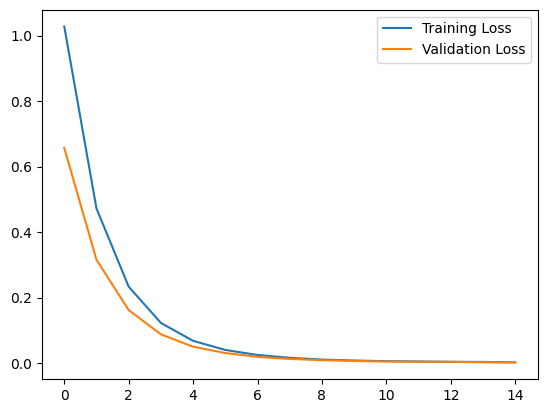

In [7]:
%pip install matplotlib
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = dict(enumerate(class_weights))

history = model.fit(
    train_images, train_labels,
    validation_data=(valid_images, valid_labels),
    class_weight=class_weights,
    epochs=15,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)





# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
import time

# check the inference time
start_time = time.time()
predictions = model.predict(test_images)
end_time = time.time()

# Inference time
inference_time = end_time - start_time
print(f"Toplam Inference Süresi: {inference_time:.4f} saniye")
print(f"Ortalama Inference Süresi: {inference_time / len(test_images):.6f} saniye/örnek")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
Toplam Inference Süresi: 0.3340 saniye
Ortalama Inference Süresi: 0.011517 saniye/örnek


In [8]:
print(f"Predictions shape: {predictions.shape}")
print(f"First prediction: {predictions[0]}")


Predictions shape: (29, 1)
First prediction: [0.44506946]


In [9]:
print(f"Predictions: {predictions}")


Predictions: [[0.44506946]
 [0.44388586]
 [0.46214595]
 [0.45981193]
 [0.44457412]
 [0.44625956]
 [0.44404387]
 [0.45772302]
 [0.44569796]
 [0.44582525]
 [0.44405034]
 [0.46004602]
 [0.47146067]
 [0.4563907 ]
 [0.45638895]
 [0.4597125 ]
 [0.4456003 ]
 [0.44596958]
 [0.4451834 ]
 [0.46278328]
 [0.45947465]
 [0.4551004 ]
 [0.4447674 ]
 [0.4588722 ]
 [0.45714468]
 [0.4580704 ]
 [0.46924764]
 [0.4715823 ]
 [0.47211513]]


In [10]:
print(f"Test Images Shape: {test_images.shape}")
print(f"Test Images Example: {test_images[0]}")


Test Images Shape: (29, 416, 416, 3)
Test Images Example: [[[0.02745098 0.02745098 0.01960784]
  [0.41568627 0.41568627 0.40784314]
  [0.77647059 0.77647059 0.76862745]
  ...
  [0.84313725 0.84313725 0.83529412]
  [0.84705882 0.84705882 0.83921569]
  [0.85490196 0.85490196 0.84705882]]

 [[0.42352941 0.42352941 0.41568627]
  [0.66666667 0.66666667 0.65882353]
  [0.87058824 0.87058824 0.8627451 ]
  ...
  [0.84705882 0.84705882 0.83921569]
  [0.85490196 0.85490196 0.84705882]
  [0.8627451  0.8627451  0.85490196]]

 [[0.77254902 0.77254902 0.76470588]
  [0.85490196 0.85490196 0.84705882]
  [0.90588235 0.90588235 0.89803922]
  ...
  [0.84705882 0.84705882 0.83921569]
  [0.85882353 0.85882353 0.85098039]
  [0.87058824 0.87058824 0.8627451 ]]

 ...

 [[0.83921569 0.83529412 0.81960784]
  [0.83529412 0.83137255 0.81568627]
  [0.84313725 0.83921569 0.82352941]
  ...
  [0.85882353 0.85490196 0.83529412]
  [0.85098039 0.84705882 0.82745098]
  [0.84705882 0.84313725 0.82352941]]

 [[0.84313725 0.

In [11]:
import os
import cv2
import numpy as np

# Create a directory to save the processed images
output_dir = "SSD_images"
os.makedirs(output_dir, exist_ok=True)

# Make predictions
predictions = model.predict(test_images)

# Process images and save them
for i, prediction in enumerate(predictions):
    # Class score
    score = prediction[0]  # The model outputs a single value

    # Get the image
    img = (test_images[i] * 255).astype(np.uint8)  # Take back to 0-255 range

    # Check scores and add a label
    label = f"Score: {score:.2f}"
    cv2.putText(
        img,
        label,
        (10, 30),  # Position
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,  # Font scale
        (0, 255, 0) if score > 0.1 else (0, 0, 255),  # Color red if score is low
        2  # Thickness
    )

    # Save the processed image
    output_path = os.path.join(output_dir, f"processed_image_{i}.jpg")
    cv2.imwrite(output_path, img)

print(f"Processed images saved to {output_dir}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Processed images saved to SSD_images
